In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from joblib import dump

In [2]:
# Load the data
df = pd.read_csv('../../data/processed-v1.csv')

# Let's assume 'is_success' is the target variable
y = df['is_success']
X = df.drop(columns=['is_success', 'product_id'], axis=1)

## Label Encodings

```
Form factor: [(0, 'bar'), (1, 'foldable'), (2, 'palm-held'), (3, 'phablet'), (4, 'slate'), (5, 'slider'), (6, 'smartphone'), (7, 'touchscreen')]

Screen Type: [(0, '1080 x 2340'), (1, '1280 x 720'), (2, '1520 x 720'), (3, '1560 x 720'), (4, '1920 x 1080'), (5, '2280 x 1080'), (6, '2340 x 1080'), (7, '2400 x 1080'), (8, '2400 x 1080, AMOLED'), (9, '2960 x 1440'), (10, '3040 x 1440'), (11, '3200 x 1440'), (12, '720 x 1544'), (13, 'AMOLED'), (14, 'FHD +'), (15, 'FHD+'), (16, 'FHD+2400x1080'), (17, 'FHD+2400x1080, FHD+'), (18, 'FWVGA'), (19, 'Full HD+ IPS Infinity Display'), (20, 'HD+'), (21, 'HD+ LCD Display'), (22, 'HD+ halo'), (23, 'HD+, hd+'), (24, 'IPS'), (25, 'IPS+Incell'), (26, 'LCD'), (27, 'LTPS'), (28, 'OLED'), (29, 'TFT'), (30, 'TFT IPS'), (31, 'WQHD+'), (32, 'hd+'), (33, 'hd+ dot notch')]

Battery type: [(0, 'Lithium'), (1, 'Lithium Ion'), (2, 'Lithium Polymer'), (3, 'Lithium-Cobalt'), (4, 'Lithium-Phosphate'), (5, 'Polymer')]

os_name: [(0, 'android'), (1, 'funtouch'), (2, 'hios'), (3, 'miui'), (4, 'oxygenos'), (5, 'realme'), (6, 's30+'), (7, 'windows')]

os_name: [(0, 'android'), (1, 'funtouch'), (2, 'hios'), (3, 'miui'), (4, 'oxygenos'), (5, 'realme'), (6, 's30+'), (7, 'windows')]
```

In [3]:
X = X.replace([np.inf, -np.inf], np.nan)
X["os_version"].fillna(X["os_version"].max() * 2, inplace=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
models_list = [
    ("Logistic Regression", LogisticRegression()), 
    ("Random Forest", RandomForestClassifier()),
    # ("LightGBM", LGBMClassifier(random_state=42)),
    # ("Support Vector Machines", SVC(random_state=42)),
    # ("XGBoost", XGBClassifier(random_state=42)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Bernoulli Naive Bayes", BernoulliNB()),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier()))
]

result = pd.DataFrame(columns=["Model", "Training Accuracy", "Testing Accuracy"])

for name, model in models_list:
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    train_score = accuracy_score(y_train, train_predictions)
    
    test_predictions = model.predict(X_test)
    test_score = accuracy_score(y_test, test_predictions)
    
    new_row = {"Model": name, "Training Accuracy": train_score, "Testing Accuracy": test_score}
    result.loc[len(result)] = new_row

result = result.sort_values(by=["Testing Accuracy", "Training Accuracy"], ascending=False)

d:\an-001-master\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\an-001-master\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [6]:
result

,Model,Training Accuracy,Testing Accuracy
1,Random Forest,1.000000,0.830769
5,Decision Tree,1.000000,0.830769
6,Bagging Classifier,0.960938,0.815385
4,KNN,0.804688,0.676923
0,Logistic Regression,0.773438,0.630769
3,Bernoulli Naive Bayes,0.722656,0.600000
2,Gaussian Naive Bayes,0.687500,0.523077


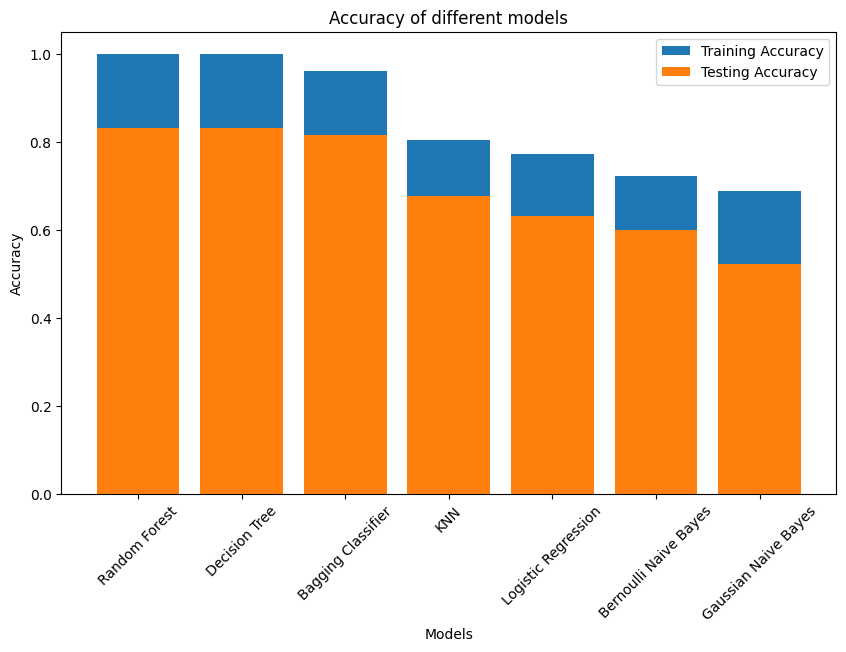

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(result["Model"], result["Training Accuracy"], label="Training Accuracy")
plt.bar(result["Model"], result["Testing Accuracy"], label="Testing Accuracy")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [8]:
random_forest_model = models_list[1][1]  # Get the Random Forest model object ONLY
file_name = "random_forest_v1.joblib"
dump(random_forest_model, file_name)

['random_forest_v1.joblib']